AICP Internship:
Q1: Import data and check null values, check column info and the descriptive statistics of the data.

In [11]:
import pandas as pd

df=pd.read_csv('Queries.csv')
print('Null Values:')
df.isnull().sum()

print('\nColumn Info:')
df.info()

print('Descriptive Statistics:')
df.describe()

Null Values:

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB
Descriptive Statistics:


,Clicks,Impressions,Position
count,1000.0000,1000.000000,1000.000000
mean,172.2750,1939.466000,3.985930
std,281.0221,4856.702605,2.841842
min,48.0000,62.000000,1.000000
25%,64.0000,311.000000,2.010000
50%,94.0000,590.500000,3.120000
75%,169.0000,1582.750000,5.342500
max,5223.0000,73380.000000,28.520000


Q2: Now convert the CTR column from a percentage string to a float.

In [12]:
df['CTR']=df['CTR'].str.rstrip('%').astype('float')/100

Q3: Now analyze common words in each search query in the following manner:
-> Create a function to clean and split the queries into words.
-> Split each query into words and count the frequency of each word.
-> Plot the word frequencies

In [13]:
from collections import Counter
import re
import plotly.express as px
import plotly.io as pio

def clean_and_split(query):
    query=query.lower()
    query=re.sub(r'[^a-zA-Z\s]','',query)

    words=query.split()
    return words

word_freq=Counter()
for query in df['Top queries']:
    words=clean_and_split(query)
    word_freq.update(words)

word_freq_df=pd.DataFrame.from_dict(word_freq, orient='index').reset_index()
word_freq_df.columns=['Word','Frequency']

fig=px.bar(word_freq_df.sort_values(by='Frequency', ascending=False).head(20), x='Word', y='Frequency', title='Top 20 most common words in search Queries')
fig.show()

Q4: Now have a look at the top queries by clicks and impressions.

In [14]:
top_clicks_df=df.sort_values(by='Clicks', ascending=False).head(20)

fig_clicks=px.bar(top_clicks_df, x='Top queries', y='Clicks', title='Top Queries by Clicks')
fig_clicks.update_layout(xaxis_title="Queries", yaxis_title='Clicks', xaxis={'categoryorder':'total descending'})
fig_clicks.show()

top_impression_df=df.sort_values(by='Impressions', ascending=False).head(20)

fig_impression=px.bar(top_impression_df, x='Top queries', y='Impressions', title='Queries by Impression')
fig_impression.update_layout(xaxis_title='Queries', yaxis_title='Impressions', xaxis={'categoryorder':'total descending'})
fig_impression.show()

Q5: Now analyze the queries with the highest and lowest CTRs.

In [19]:
top_CTR=df.sort_values(by='CTR', ascending=False).head(10)

fig_top_CTR=px.bar(top_CTR, x='Top queries', y='CTR', title='Top Queries by CTR')
fig_top_CTR.update_layout(xaxis_title='Top queries',yaxis_title='CTR', xaxis={'categoryorder':'total descending'} )
fig_top_CTR.show()

bottom_CTR=df.sort_values(by='CTR', ascending=True).head(10)

fig_top_CTR=px.bar(bottom_CTR, x='Top queries', y='CTR', title='Bottom Queries by CTR')
fig_top_CTR.update_layout(xaxis_title='Top queries',yaxis_title='CTR', xaxis={'categoryorder':'total ascending'} )
fig_top_CTR.show()

Q6: Now check the correlation between different metrics. Also explain your observation from
the correlation matrix.

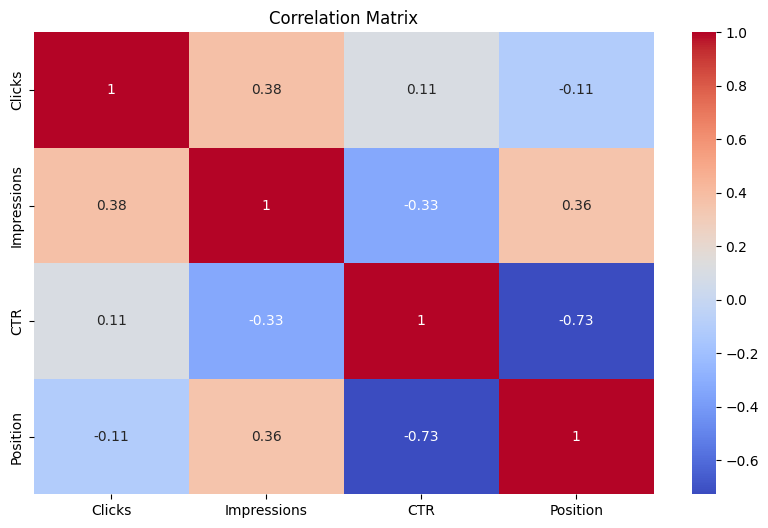

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix=df[['Clicks','Impressions','CTR','Position']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Q7: Now, detect anomalies in search queries. You can use various techniques for anomaly
detection. A simple and effective method is the Isolation Forest algorithm, which works well with
different data distributions and is efficient with large datasets.

In [17]:
from sklearn.ensemble import IsolationForest

X=df[['Clicks','Impressions','CTR','Position']]

clf=IsolationForest(contamination=0.05, random_state=42)

clf.fit(X)

df['Anomaly']=clf.predict(X)

anomalies=df[df['Anomaly']==-1]

print(anomalies)

                                      Top queries  Clicks  Impressions  \
0                     number guessing game python    5223        14578   
1                             thecleverprogrammer    2809         3456   
2                python projects with source code    2077        73380   
3       classification report in machine learning    2012         4959   
4                           the clever programmer    1931         2528   
5             standard scaler in machine learning    1559         7292   
6                                    aman kharwal    1490         5752   
7                     python turtle graphics code    1455        13585   
8           python game projects with source code    1421         4946   
9             82 python projects with source code    1343         3562   
10                        guess the number python    1287         4569   
11                              clever programmer    1243        21566   
12    car price prediction using machi